In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
sub = pd.read_csv('./MSampleSubmissionStage1_2020.csv')

In [3]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11390 entries, 0 to 11389
Data columns (total 2 columns):
ID      11390 non-null object
Pred    11390 non-null float64
dtypes: float64(1), object(1)
memory usage: 133.5+ KB


In [4]:
sub['Season'] = sub['ID'].str[:4]
sub['LowTeamID'] = sub['ID'].str[5:9]
sub['HighTeamID'] = sub['ID'].str[10:]

In [5]:
sub.head()

,ID,Pred,Season,LowTeamID,HighTeamID
0,2015_1107_1112,0.5,2015,1107,1112
1,2015_1107_1116,0.5,2015,1107,1116
2,2015_1107_1124,0.5,2015,1107,1124
3,2015_1107_1125,0.5,2015,1107,1125
4,2015_1107_1129,0.5,2015,1107,1129


## Regular Season Data

In [6]:
RSR = pd.read_csv('./MRegularSeasonCompactResults.csv')

In [7]:
RSR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161552 entries, 0 to 161551
Data columns (total 8 columns):
Season     161552 non-null int64
DayNum     161552 non-null int64
WTeamID    161552 non-null int64
WScore     161552 non-null int64
LTeamID    161552 non-null int64
LScore     161552 non-null int64
WLoc       161552 non-null object
NumOT      161552 non-null int64
dtypes: int64(7), object(1)
memory usage: 9.2+ MB


In [8]:
RSR = RSR[RSR['Season']>=2015]

In [9]:
RSR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26986 entries, 134566 to 161551
Data columns (total 8 columns):
Season     26986 non-null int64
DayNum     26986 non-null int64
WTeamID    26986 non-null int64
WScore     26986 non-null int64
LTeamID    26986 non-null int64
LScore     26986 non-null int64
WLoc       26986 non-null object
NumOT      26986 non-null int64
dtypes: int64(7), object(1)
memory usage: 1.8+ MB


In [10]:
SeasonWins = RSR.groupby(['Season','WTeamID'],as_index=False)['DayNum'].count().rename(columns={'DayNum':'Wins'})
SeasonLosses = RSR.groupby(['Season','LTeamID'],as_index=False)['DayNum'].count().rename(columns={'DayNum':'Losses'})

In [11]:
SeasonWins.head()

,Season,WTeamID,Wins
0,2015,1101,7
1,2015,1102,12
2,2015,1103,20
3,2015,1104,17
4,2015,1105,8


In [12]:
SeasonLosses.head()

,Season,LTeamID,Losses
0,2015,1101,21
1,2015,1102,17
2,2015,1103,14
3,2015,1104,14
4,2015,1105,20


In [13]:
SeasonRecord = pd.merge(SeasonWins,SeasonLosses,left_on=['Season','WTeamID'],right_on=['Season','LTeamID'])

In [14]:
SeasonRecord.head()

,Season,WTeamID,Wins,LTeamID,Losses
0,2015,1101,7,1101,21
1,2015,1102,12,1102,17
2,2015,1103,20,1103,14
3,2015,1104,17,1104,14
4,2015,1105,8,1105,20


In [15]:
SeasonRecord['Pct'] = SeasonRecord['Wins']/(SeasonRecord['Wins']+SeasonRecord['Losses'])

In [16]:
SeasonRecord.head()

,Season,WTeamID,Wins,LTeamID,Losses,Pct
0,2015,1101,7,1101,21,0.250000
1,2015,1102,12,1102,17,0.413793
2,2015,1103,20,1103,14,0.588235
3,2015,1104,17,1104,14,0.548387
4,2015,1105,8,1105,20,0.285714


## Post Season Data

In [33]:
PSR = pd.read_csv('./MNCAATourneyCompactResults.csv')

In [34]:
PSR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 8 columns):
Season     2251 non-null int64
DayNum     2251 non-null int64
WTeamID    2251 non-null int64
WScore     2251 non-null int64
LTeamID    2251 non-null int64
LScore     2251 non-null int64
WLoc       2251 non-null object
NumOT      2251 non-null int64
dtypes: int64(7), object(1)
memory usage: 131.9+ KB


In [35]:
PSR.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [36]:
PSR = PSR[PSR['Season']>=2015]
PSR['LowTeamID'] = np.where(PSR['LTeamID']<PSR['WTeamID'],PSR['LTeamID'],PSR['WTeamID'])
PSR['HighTeamID'] = np.where(PSR['LTeamID']<PSR['WTeamID'],PSR['WTeamID'],PSR['LTeamID'])

In [37]:
PSR.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,LowTeamID,HighTeamID
1916,2015,134,1214,74,1264,64,N,0,1214,1264
1917,2015,134,1279,94,1140,90,N,0,1140,1279
1918,2015,135,1173,56,1129,55,N,0,1129,1173
1919,2015,135,1352,81,1316,77,N,0,1316,1352
1920,2015,136,1112,93,1411,72,N,0,1112,1411


In [38]:
PSR['LowTeamWin'] = np.where(PSR['LowTeamID']==PSR['WTeamID'],1,0)

In [39]:
PSR.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,LowTeamID,HighTeamID,LowTeamWin
1916,2015,134,1214,74,1264,64,N,0,1214,1264,1
1917,2015,134,1279,94,1140,90,N,0,1140,1279,0
1918,2015,135,1173,56,1129,55,N,0,1129,1173,0
1919,2015,135,1352,81,1316,77,N,0,1316,1352,0
1920,2015,136,1112,93,1411,72,N,0,1112,1411,1


## Features Data

In [75]:
df = pd.DataFrame(PSR[['Season','LowTeamID','HighTeamID','LowTeamWin']])

In [77]:
df = pd.merge(df,SeasonRecord[['Season','LTeamID','Pct']],how='left',left_on=['Season','LowTeamID'],right_on=['Season','LTeamID'])


In [79]:
df = pd.merge(df,SeasonRecord[['Season','LTeamID','Pct']],how='left',left_on=['Season','HighTeamID'],right_on=['Season','LTeamID'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 334
Data columns (total 8 columns):
Season        335 non-null int64
LowTeamID     335 non-null int64
HighTeamID    335 non-null int64
LowTeamWin    335 non-null int32
LTeamID_x     332 non-null float64
Pct_x         332 non-null float64
LTeamID_y     333 non-null float64
Pct_y         333 non-null float64
dtypes: float64(4), int32(1), int64(3)
memory usage: 22.2 KB


In [52]:
df.head()

,Season,LowTeamID,HighTeamID,LowTeamWin,LTeamID,Pct
0,2015,1214,1264,1,1214.0,0.484848
1,2015,1140,1279,0,1140.0,0.718750
2,2015,1129,1173,0,1129.0,0.741935
3,2015,1316,1352,0,1316.0,0.645161
4,2015,1112,1411,1,1112.0,0.911765


In [55]:
df.groupby(['Season','LowTeamWin'])['Pct'].mean()

Season  LowTeamWin
2015    0             0.707393
        1             0.800579
2016    0             0.696539
        1             0.733865
2017    0             0.748412
        1             0.809962
2018    0             0.698128
        1             0.754990
2019    0             0.724232
        1             0.748761
Name: Pct, dtype: float64

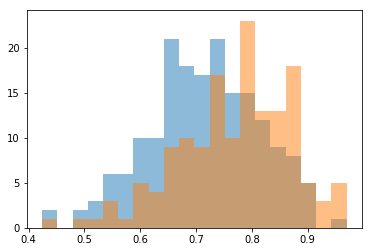

In [69]:
x0 = df[df['LowTeamWin']==0]
x1 = df[df['LowTeamWin']==1]

plt.hist(x0['Pct'].dropna(),alpha=0.5,bins=20)
plt.hist(x1['Pct'].dropna(),alpha=0.5,bins=20)
plt.show()

In [ ]:
pwd